## Heart Attack Prediction - Using Linear Classifiers & Tree Modeling

### Overview
In previous notebook (uploaded on GitHub in Data-Engineering-Visualization repository), we performed EDA on this "Heart Patients Data". Now
in this notebook, we undertake a comprehensive exploration of a heart patient dataset to understand critical factors influencing heart health. Cardiovascular diseases are among the leading causes of mortality worldwide, and data-driven insights play a crucial role in diagnosing and predicting heart conditions. By analyzing the data, we aim to reveal patterns, relationships, and influential factors, which can guide further predictive modeling and aid in preventive care strategies.

I am making this notebook visible on my GitHub as part of series of my projects related to Data Analysis and Data Engineering. There is another repository on my profile that comprises of my Machine Learning & AI Projects. You can checkout it here:
<br>
https://github.com/FaizanSSDQ/Machine-Learning-Projects.git


**I have append the further process of ML to same notebook at which EDA was performed. You can skip this section and scroll down to ML Section.**





### Objective

The primary goal of this analysis is to conduct an in-depth Exploratory Data Analysis (EDA) to uncover meaningful insights about patients' heart health. This EDA process will help us identify data trends, outliers, correlations, and relationships that could be pivotal for developing predictive models to assess heart disease risk in individuals. We will also ensure the data is properly prepared, handled, and visualized for further applications in data science and machine learning.

In this notebook, we will just explore the data and understand it. In another project I have designed an ML model for this dataset that does predictions. You can check it out on my Machine Learning Project repository on github. (The link is placed above)

### Dataset Overview

The heart patient dataset contains information about a variety of patient metrics, both categorical and continuous. Here is a brief overview of the features included:

- **`age`**: Age of the patient
- **`sex`**: Gender of the patient (1 = Male, 0 = Female)
- **`cp (Chest Pain Type)`**: Four types of chest pain, categorized as follows:
  - 0 = Typical Angina
  - 1 = Atypical Angina
  - 2 = Non-anginal Pain
  - 3 = Asymptomatic
- **`trtbps (Resting Blood Pressure)`**: Resting blood pressure in mm Hg at the time of hospital admission
- **`chol (Cholesterol)`**: Serum cholesterol level in mg/dl
- **`fbs (Fasting Blood Sugar)`**: Indicates if fasting blood sugar > 120 mg/dl (1 = True, 0 = False)
- **`restecg (Resting Electrocardiographic Results)`**: Categorized as follows:
  - 0 = Normal
  - 1 = Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - 2 = Showing probable or definite left ventricular hypertrophy
- **`thalachh (Maximum Heart Rate Achieved)`**: Highest heart rate achieved during a test
- **`oldpeak`**: ST depression induced by exercise relative to rest
- **`slp (Slope)`**: Slope of the peak exercise ST segment
- **`caa (Number of Major Vessels)`**: Number of major vessels (0-3) colored by fluoroscopy
- **`thall (Thalium Stress Test Result)`**: A test result range from 0 to 3 indicating stress-test results
- **`exng (Exercise-Induced Angina)`**: Indicates if exercise-induced angina occurred (1 = Yes, 0 = No)
- **`output (Target)`**: Indicator if the patient has a risk of heart disease (1 = Yes, 0 = No)

### Our Approach

We will conduct the following steps in our exploratory journey:

1. **Initial Data Exploration**: Inspecting the structure, data types, and distributions to build a foundation for our analysis.
2. **Data Cleaning**: Identifying and handling missing values, erroneous data points, and other potential issues.
3. **Outlier Detection and Analysis**: Assessing the extent of outliers and understanding their impact on key variables.
4. **Feature Analysis**: Examining the distributions of both continuous and categorical features, and exploring relationships with the target variable.
5. **Correlation Study**: Investigating relationships among numerical features to identify potential multicollinearity or patterns of significance.
6. **Visualization-Driven Insights**: Utilizing visualizations such as scatterplots, histograms, boxplots, and heatmaps to derive intuitive insights about patient data.
7. **Preparing Data for Predictive Modeling**: Laying the groundwork for future predictive tasks by preparing features through scaling, encoding, and splitting data as needed.

This analysis is a critical step towards building models capable of predicting heart disease risks and gaining deeper medical insights. Let's begin our journey!


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
data = pd.read_csv("heart.csv")

#### Displaying the First Few Rows of the Dataset

In this step, we use the `head()` function to display the first few rows of the dataset. This provides an initial glimpse of the data, allowing us to understand the structure, columns, and sample values in the dataset. This step is essential for getting a quick overview of the data before proceeding with further analysis.


In [ ]:
data.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Checking Data Types and Missing Values
Next, we use the `info()` function to inspect the data types of each column, as well as to check for any missing or null values in the dataset. This helps us understand the structure of the dataset more clearly and ensures that we are aware of any potential issues that might require cleaning or handling later.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.shape

(303, 14)

In [ ]:
data.shape[0]

303

In [ ]:
data.shape[1]

14

#### Summary Statistics of Numerical Features
Finally, we use the `describe()` function to generate summary statistics for the numerical features in the dataset. This includes metrics such as mean, standard deviation, min, max, and percentiles. This helps in understanding the central tendencies and spread of the data, and can highlight outliers or any anomalies in the numerical columns.

In [ ]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Separating Categorical and continues type data
categorical = ['sex' , 'cp' , 'fbs' , 'restecg' , 'exng' , 'thall' , 'slp']
continues = ['age' , 'trtbps' , 'chol' , 'thalachh' , 'oldpeak' , 'caa']
targe = ['output']

### Separating Categorical and Continuous Data

In this step, we separate the dataset into categorical and continuous features. This distinction is important because different types of features require different preprocessing steps and analysis techniques.

- **Categorical Features**: These are variables that represent categories or groups, often used for classification tasks. In this dataset, the categorical features are:
  - **`sex`**: Gender of the patient
  - **`cp`**: Chest pain type
  - **`fbs`**: Fasting blood sugar greater than 120 mg/dl
  - **`restecg`**: Resting electrocardiographic results
  - **`exng`**: Exercise-induced angina
  - **`thall`**: Thalium Stress Test result
  - **`slp`**: Slope of the peak exercise ST segment

- **Continuous Features**: These are numerical features that represent measurable quantities. They are usually treated differently from categorical variables in data analysis and machine learning:
  - **`age`**: Age of the patient
  - **`trtbps`**: Resting blood pressure
  - **`chol`**: Cholesterol level
  - **`thalachh`**: Maximum heart rate achieved
  - **`oldpeak`**: ST depression induced by exercise
  - **`caa`**: Number of major vessels colored by fluoroscopy

- **Target Variable**: The target variable (`output`) represents whether the patient has heart disease (1 = Yes, 0 = No).

We create separate lists to organize the features into these categories, which will help guide further analysis and preprocessing steps.



In [ ]:
data.head(-5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [ ]:
# Checking the number of values in eah column:
data.columns
type(data.columns)

pandas.core.indexes.base.Index

### Counting Unique Values in Each Column

In this step, we create a dictionary to store the number of unique values for each column in the dataset. This is important for understanding the diversity of values within each feature, especially for categorical features. By counting the unique values, we can assess whether a feature is categorical or continuous, and it can also help us detect any unexpected or erroneous data points.

The code iterates over each column in the dataset and uses the `value_counts()` function to determine how many distinct values each feature has. This information is then stored in a dictionary, where the keys are the column names, and the values are the counts of unique values.



In [ ]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

In [ ]:
print(dict)

{'age': 41, 'sex': 2, 'cp': 4, 'trtbps': 49, 'chol': 152, 'fbs': 2, 'restecg': 3, 'thalachh': 91, 'exng': 2, 'oldpeak': 40, 'slp': 3, 'caa': 5, 'thall': 4, 'output': 2}


In [ ]:
len(dict['age'])

41

In [ ]:
df = data.head(5)

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
col_list = df.columns

In [ ]:
col_list

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
my_dict = {}

for i in col_list:
    my_dict[i] = df[i].value_counts().shape[0]

In [ ]:
my_dict

{'age': age
 63    1
 37    1
 41    1
 56    1
 57    1
 Name: count, dtype: int64,
 'sex': sex
 1    3
 0    2
 Name: count, dtype: int64,
 'cp': cp
 1    2
 3    1
 2    1
 0    1
 Name: count, dtype: int64,
 'trtbps': trtbps
 130    2
 120    2
 145    1
 Name: count, dtype: int64,
 'chol': chol
 233    1
 250    1
 204    1
 236    1
 354    1
 Name: count, dtype: int64,
 'fbs': fbs
 0    4
 1    1
 Name: count, dtype: int64,
 'restecg': restecg
 1    3
 0    2
 Name: count, dtype: int64,
 'thalachh': thalachh
 150    1
 187    1
 172    1
 178    1
 163    1
 Name: count, dtype: int64,
 'exng': exng
 0    4
 1    1
 Name: count, dtype: int64,
 'oldpeak': oldpeak
 2.3    1
 3.5    1
 1.4    1
 0.8    1
 0.6    1
 Name: count, dtype: int64,
 'slp': slp
 2    3
 0    2
 Name: count, dtype: int64,
 'caa': caa
 0    5
 Name: count, dtype: int64,
 'thall': thall
 2    4
 1    1
 Name: count, dtype: int64,
 'output': output
 1    5
 Name: count, dtype: int64}

Checking for Missing Values:

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


### No Missing Values in the Dataset

Upon inspecting the dataset, we observe that there are no missing or null values in any of the features. This is a crucial finding because missing data can pose significant challenges during analysis and modeling. It may require techniques such as imputation or data removal, depending on the nature of the missing values.

In our case, since every feature is complete and contains no missing values, we do not need to perform any imputation or data cleaning for missing values. This allows us to move forward in the analysis without the need for additional preprocessing steps related to missing data.

With the data being clean in terms of missing values, we are now all set to proceed with further steps, including exploratory data analysis (EDA), feature engineering, and eventually building predictive models.


## Performing Exploratory Data Analysis (EDA)

Now that we have completed the initial data inspection and ensured there are no missing values, we will proceed with **Exploratory Data Analysis (EDA)**.

EDA is a critical step in the data analysis process that helps us better understand the dataset by summarizing its key characteristics, often with the help of visualizations. The main objectives of this phase are to:

- Gain insights into the distribution and relationships of variables.
- Identify trends, patterns, and potential outliers in the data.
- Understand the nature of the features (whether they are categorical or continuous) and their interaction with the target variable.
- Visualize correlations between features and explore the overall structure of the dataset.

Through EDA, we can uncover valuable patterns or anomalies that may influence our model-building process later. This process will help us decide on the next steps, such as feature engineering, handling outliers, and preparing the data for machine learning algorithms.


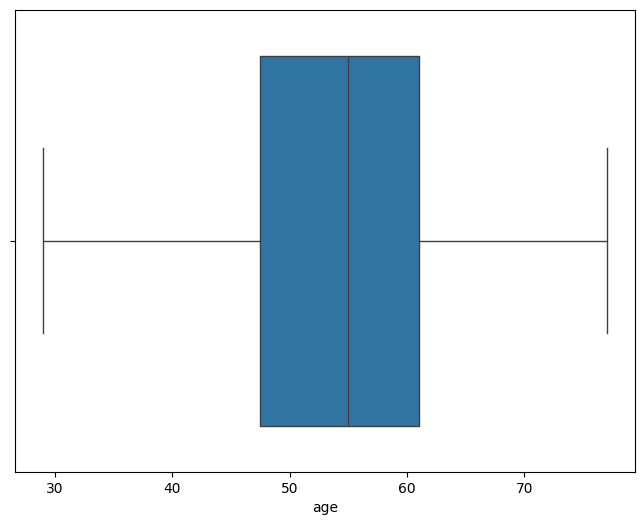

In [ ]:
plt.figure(figsize=(8 , 6))
sns.boxplot(x=data['age'])
plt.show()

### Plotting Boxplots for Continuous Features

In this step, we visualize the distribution of the continuous features in the dataset using **boxplots**. Boxplots are a powerful tool for detecting outliers and understanding the spread of the data.

We focus on the following continuous features:
- **`age`**: Age of the patient
- **`trtbps`**: Resting blood pressure
- **`chol`**: Cholesterol level
- **`thalachh`**: Maximum heart rate achieved
- **`oldpeak`**: ST depression induced by exercise
- **`caa`**: Number of major vessels colored by fluoroscopy

By plotting boxplots for these features, we can quickly identify potential outliers and gain insights into the central tendency (median), variability (interquartile range), and the presence of extreme values.

Each subplot represents one continuous feature, and the boxplot will show the range of values, the median, and any potential outliers. This helps us to visually assess the distribution and detect any irregularities that may require further investigation.



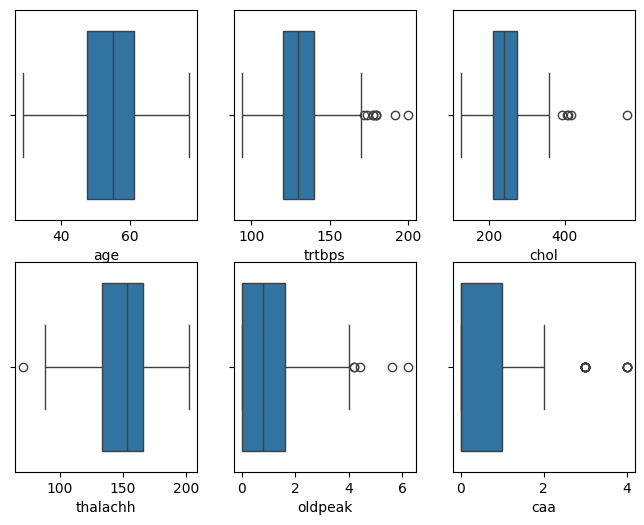

In [ ]:
#Plotting boxplots of continous features
continues = ['age' , 'trtbps' , 'chol' , 'thalachh' , 'oldpeak' , 'caa']

plt.figure(figsize=(8 , 6))
for i , col in enumerate(continues):
    plt.subplot(2 , 3 , i+1)
    sns.boxplot(x=data[col])
plt.show()


### Plotting Histograms for Continuous Features

In this step, we visualize the distribution of the continuous features in the dataset using **histograms**. Histograms provide a useful way to see the frequency distribution of a dataset and identify any skewness, peaks, or unusual patterns.

We plot histograms for the following continuous features:
- **`age`**: Age of the patient
- **`trtbps`**: Resting blood pressure
- **`chol`**: Cholesterol level
- **`thalachh`**: Maximum heart rate achieved
- **`oldpeak`**: ST depression induced by exercise
- **`caa`**: Number of major vessels colored by fluoroscopy

Histograms allow us to assess the distribution of each feature. For example, we can observe whether the feature is normally distributed, skewed, or has multiple peaks. This understanding can guide further analysis or data transformations (e.g., normalization) if required.

Each subplot represents one continuous feature, and the `sns.histplot` function is used to create a histogram for each feature. The histograms will display the frequency of different values for each feature, helping us identify any underlying patterns or distributions.



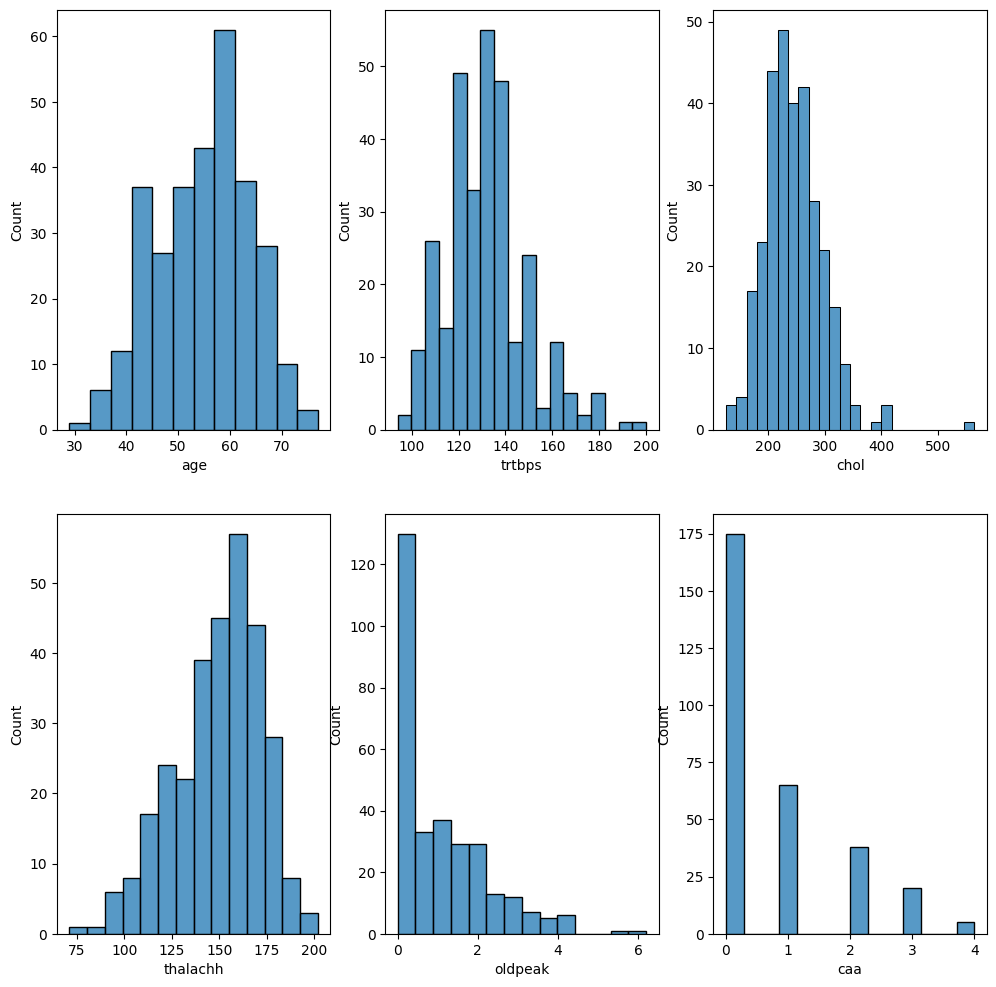

In [ ]:
#Plotting Histplot of all continous variables

continues = ['age' , 'trtbps' , 'chol' , 'thalachh' , 'oldpeak' , 'caa']
plt.figure(figsize=(12 , 12))
for i , col in enumerate(continues):
    plt.subplot(2 , 3 , i+1)
    sns.histplot(data[col])
plt.show()

### Plotting Count Plots for Categorical Features

In this step, we visualize the distribution of the categorical features in the dataset using **count plots**. Count plots are useful for displaying the frequency of each category in a categorical variable, allowing us to understand the distribution of values and detect any imbalances in the data.

We plot count plots for the following categorical features:
- **`sex`**: Sex of the patient (Male or Female)
- **`cp`**: Chest pain type (0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic)
- **`fbs`**: Fasting blood sugar > 120 mg/dl (1 = True, 0 = False)
- **`restecg`**: Resting electrocardiographic results (0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy)
- **`exng`**: Exercise induced angina (1 = Yes, 0 = No)
- **`thall`**: Thalium Stress Test result (0, 3)
- **`slp`**: Slope (the slope of the peak exercise ST segment)

Each subplot represents one categorical feature, and the `sns.countplot` function is used to create a count plot for each feature. The count plot displays the number of occurrences for each category in the feature, helping us identify if any classes are imbalanced or have disproportionate frequencies.




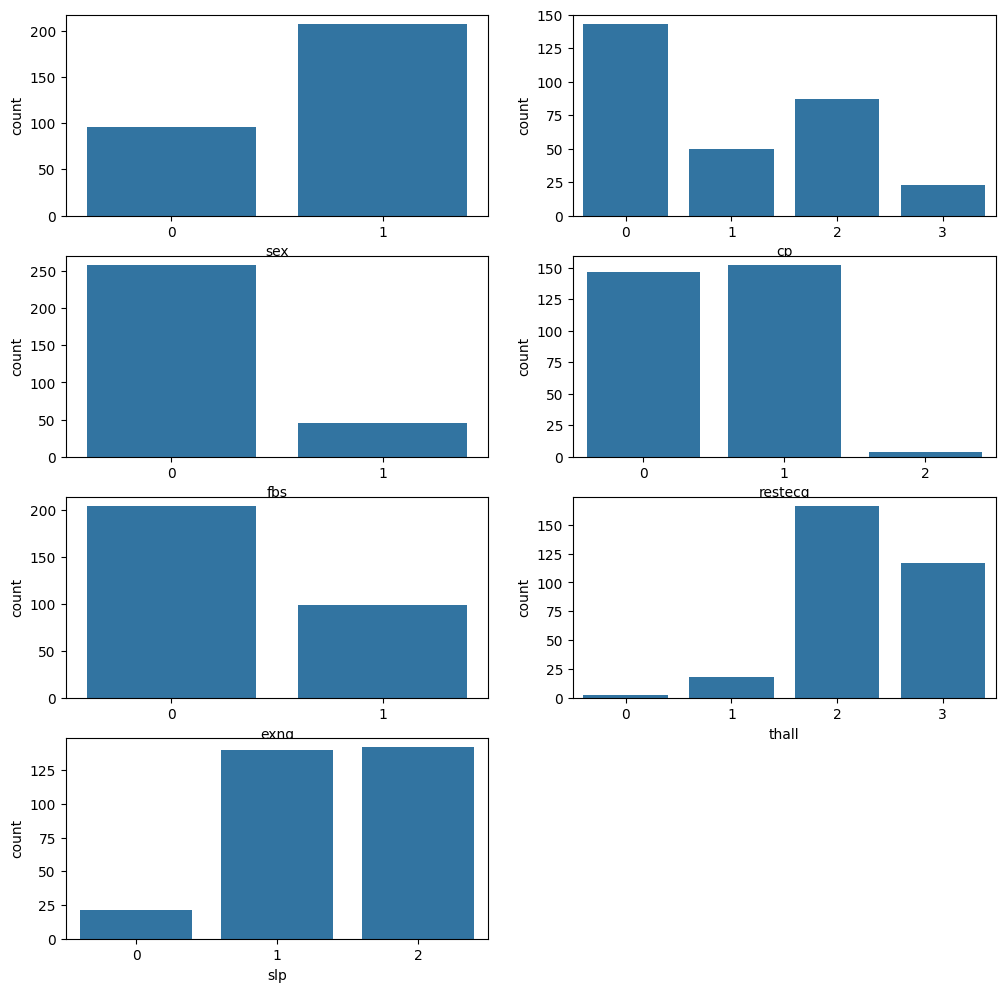

In [ ]:
#Plotting Histplot of all continous variables

categorical = ['sex' , 'cp' , 'fbs' , 'restecg' , 'exng' , 'thall' , 'slp']
plt.figure(figsize=(12 , 12))
for i , col in enumerate(categorical):
    plt.subplot(4 , 2 , i+1)
    sns.countplot(data= data , x = col)
plt.show()




Lets plot these graphs in a more dynamic way. I have copied this designing code from somewhere else by just replacing the variables. The purpose of this activity is just to make things more beautiful and nothing else.

<ipython-input-59-aeeb1ca15b70>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax1,data=data,x='sex',palette=color_palette)
<ipython-input-59-aeeb1ca15b70>:46: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(ax=ax1,data=data,x='sex',palette=color_palette)
<ipython-input-59-aeeb1ca15b70>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2,data=data,x='exng',palette=color_palette)
<ipython-input-59-aeeb1ca15b70>:53: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(ax=ax2,data=data,x='exng',palette=color_palette)
<ipython-input-59-aeeb1ca15b70>:60: FutureWa

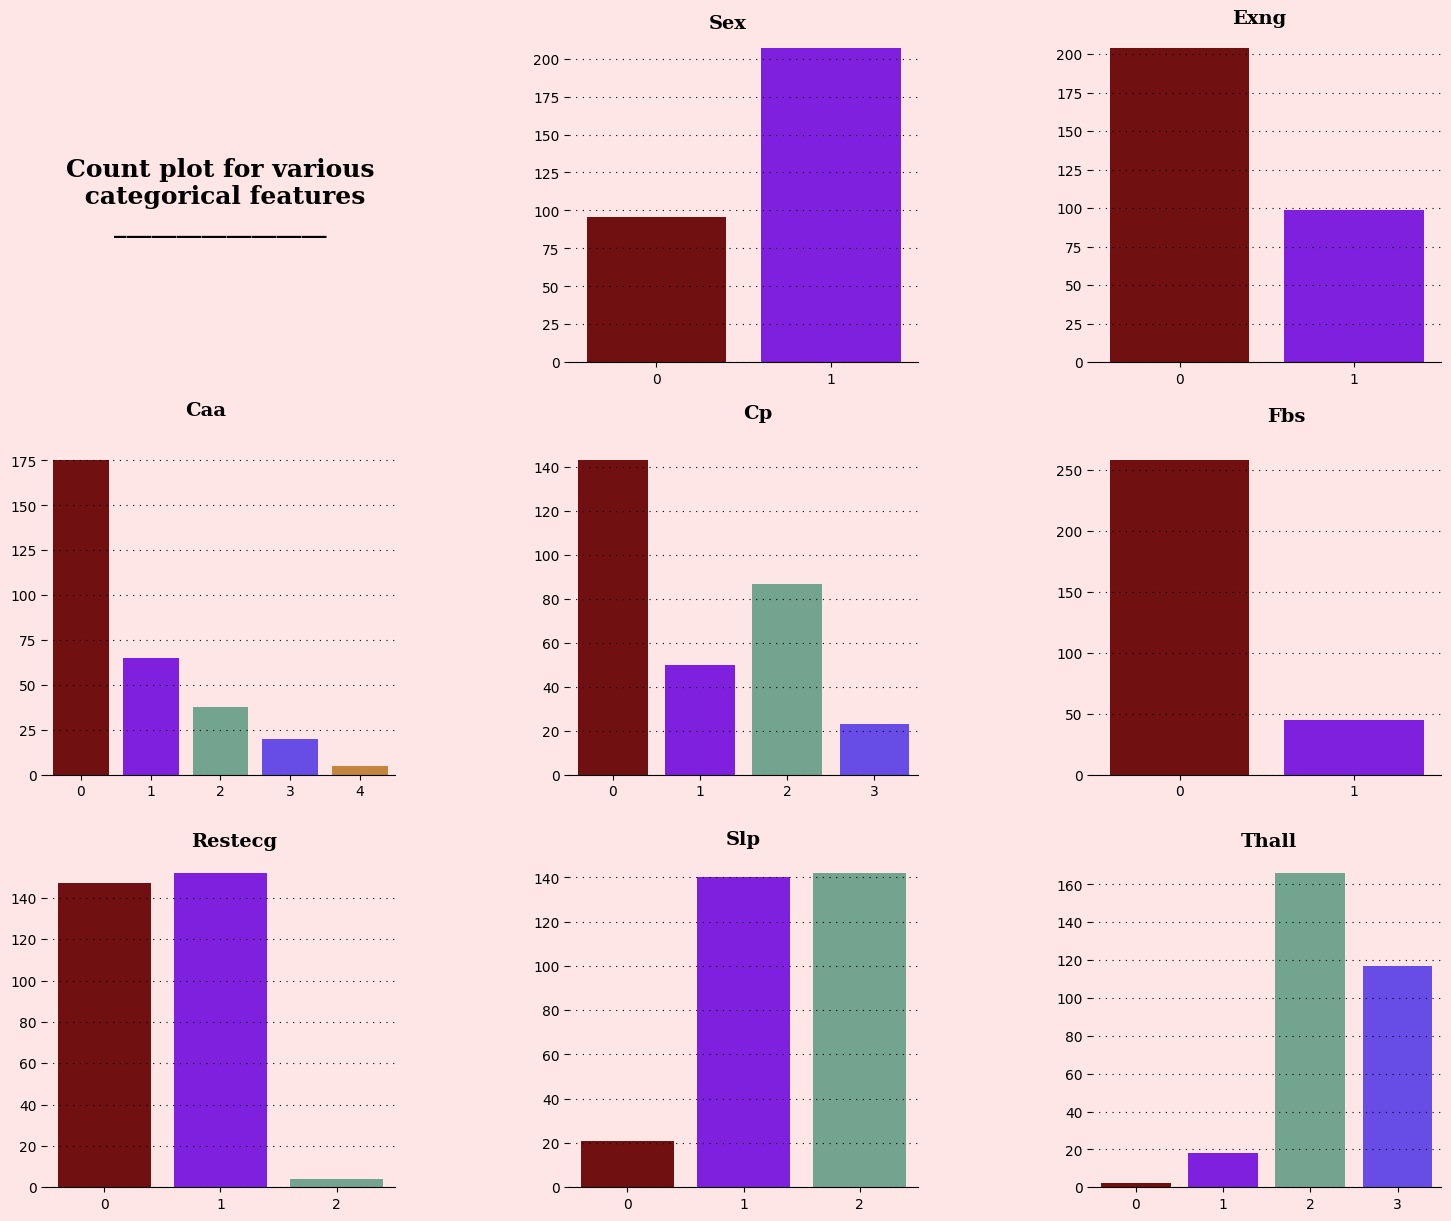

In [ ]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=data,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=data,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=data,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=data,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=data,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=data,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=data,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=data,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

### Boxplot with more attractive and explorative design.

<ipython-input-60-af0f7e9abff3>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(ax=ax1,y=data['age'],palette=["#800000"],width=0.6)
<ipython-input-60-af0f7e9abff3>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(ax=ax2,y=data['trtbps'],palette=["#8000ff"],width=0.6)
<ipython-input-60-af0f7e9abff3>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(ax=ax3,y=data['chol'],palette=["#6aac90"],width=0.6)
<ipython-input-60-af0f7e9abff3>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.

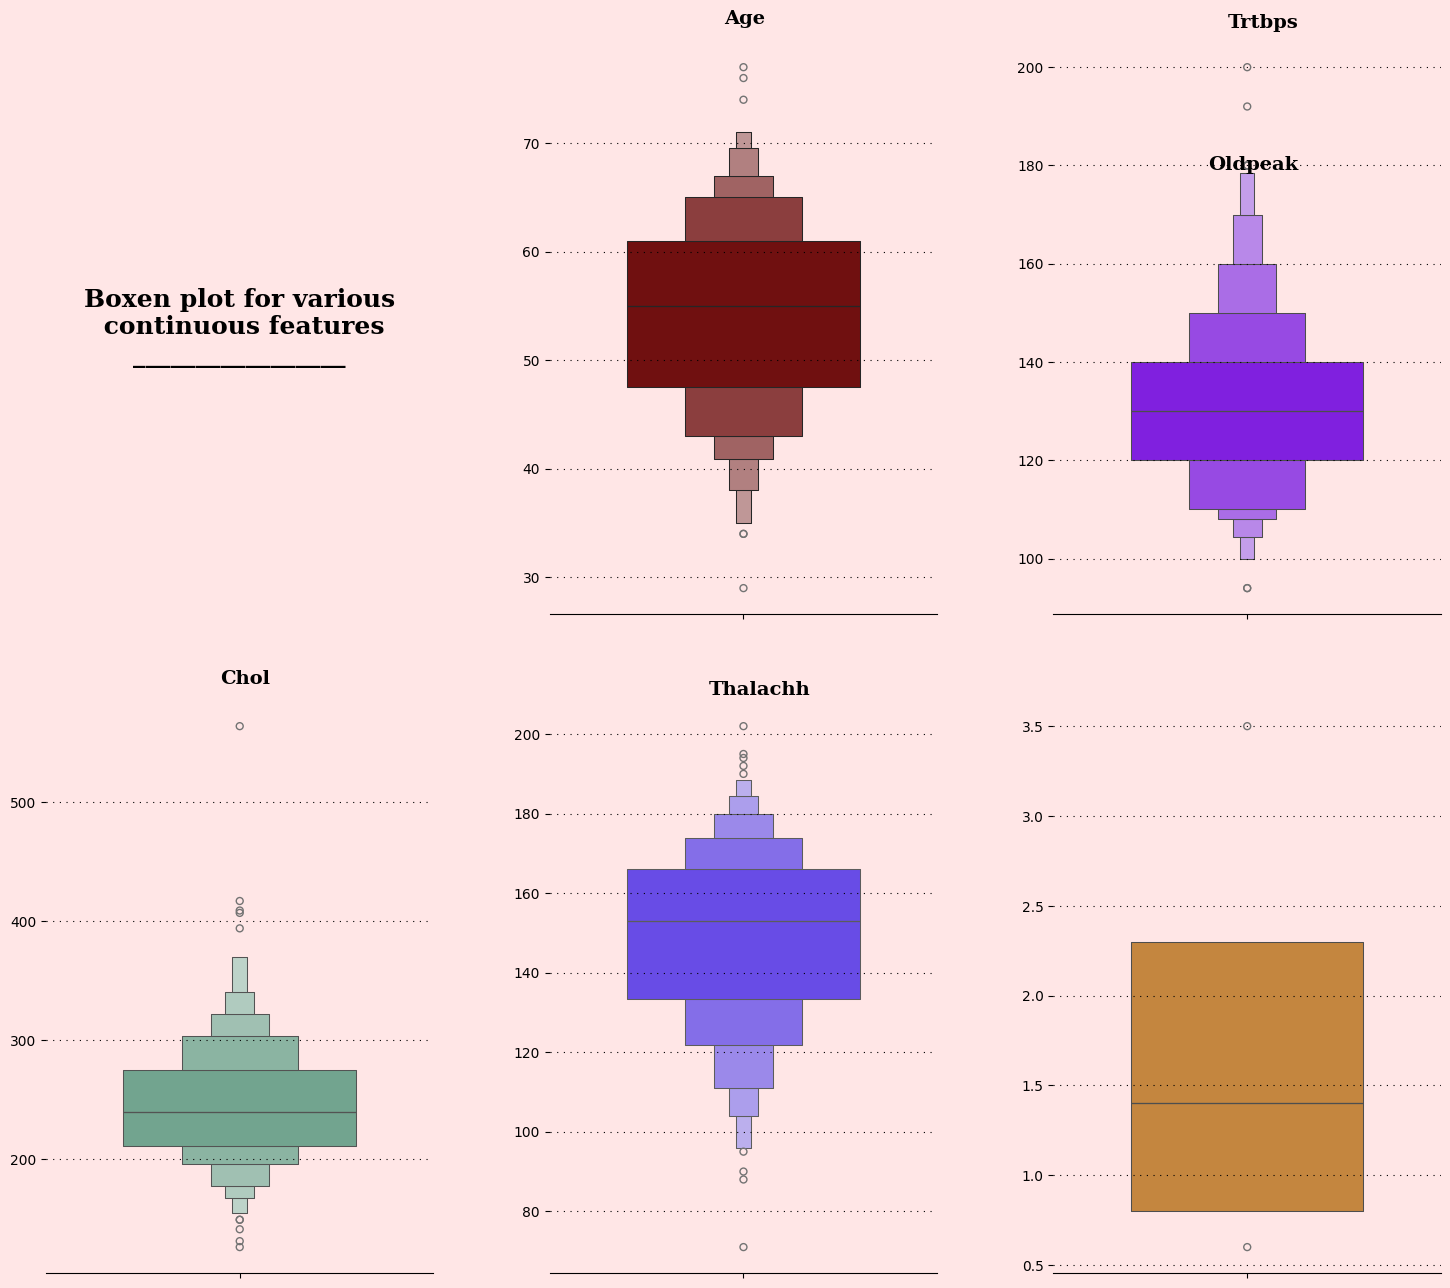

In [ ]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=data['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=data['trtbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=data['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=data['thalachh'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)


Plotting separately the countplot of target variable.

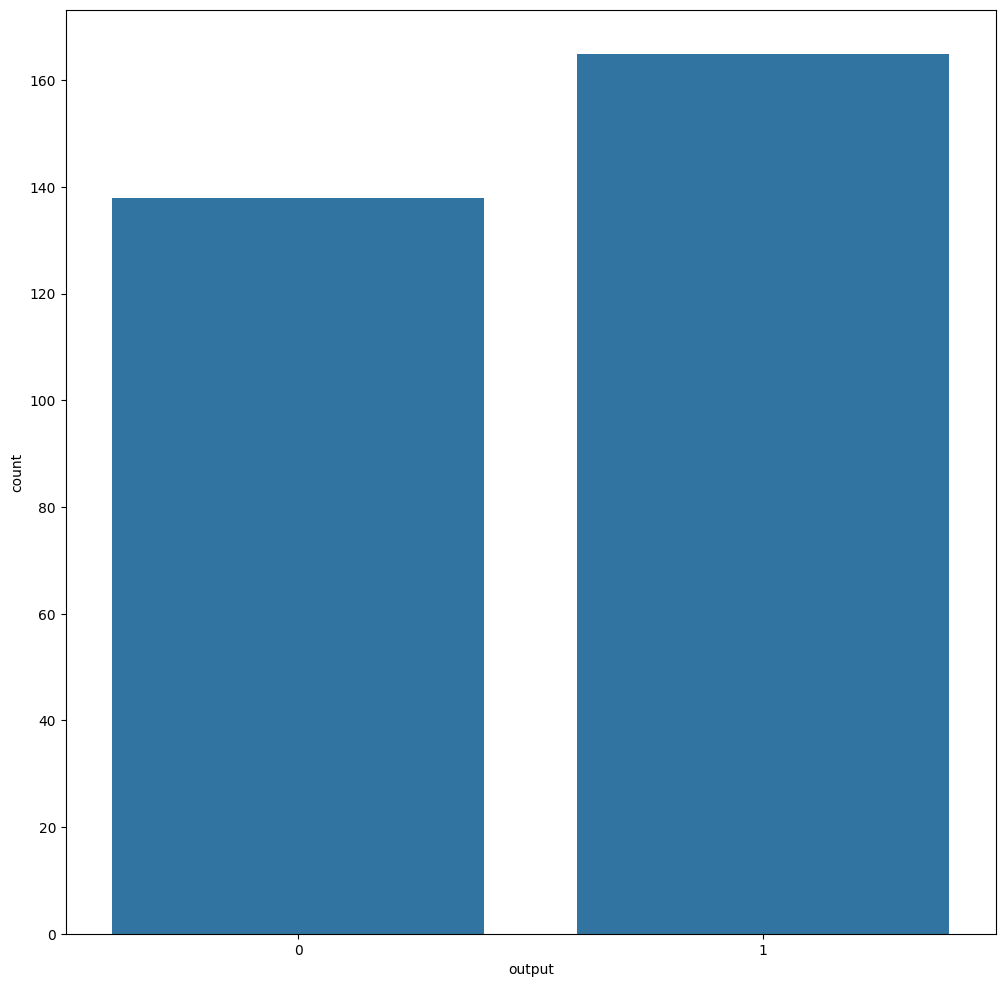

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(data=data , x = "output")
plt.show()

### Handling Outliers

Given that our dataset contains a relatively small number of rows (data points), and considering that the values of most of our features align with the expected range based on the nature of the variables, we have decided to retain the outliers for the time being. Although outliers can sometimes skew analysis, in this case, we will proceed with the current data as the outliers may hold valuable information regarding the diversity of the population. We will revisit and address the outlier issue when we proceed to the machine learning phase, where more robust techniques can be applied to handle their potential impact on model performance.


### Bivariate Analysis

In this step, we perform **bivariate analysis** to explore the relationship between two variables at a time. The goal is to understand how pairs of features interact with each other and how they may impact the target variable, **`output`** (the presence of heart disease).

Bivariate analysis helps to identify patterns, correlations, and potential interactions between variables. We can gain valuable insights such as:

- **Correlations** between features: How strongly two numerical features are related.
- **Distribution patterns** for categorical variables: Whether certain categories have a higher or lower occurrence of the target variable.
- **Feature importance**: Which features have a stronger influence on predicting the outcome.

Through visualizations such as **scatter plots**, **box plots**, and **correlation matrices**, we can assess the nature of the relationships and gain a better understanding of which features are most informative for predicting heart disease.

In this analysis, we focus on both categorical and continuous features and their relationship with the target variable.


In [ ]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Correlation Matrix Heatmap

In this step, we visualize the correlations between numerical features in the dataset using a **heatmap**. The correlation matrix allows us to see how strongly each pair of features is related. Correlation values range from -1 to 1:

- A value of **1** indicates a perfect positive correlation, meaning as one variable increases, the other also increases.
- A value of **-1** indicates a perfect negative correlation, meaning as one variable increases, the other decreases.
- A value of **0** indicates no correlation between the variables.

The heatmap provides a visual representation of these relationships, where colors indicate the strength and direction of the correlation, making it easier to identify which features are strongly related.

In this case, we used `sns.heatmap` to create the correlation matrix, where:
- The diagonal elements represent the correlation of a feature with itself (which is always 1).
- The off-diagonal elements show the correlations between pairs of features.

This analysis helps us identify highly correlated features and potential multicollinearity, which can be important when building predictive models.




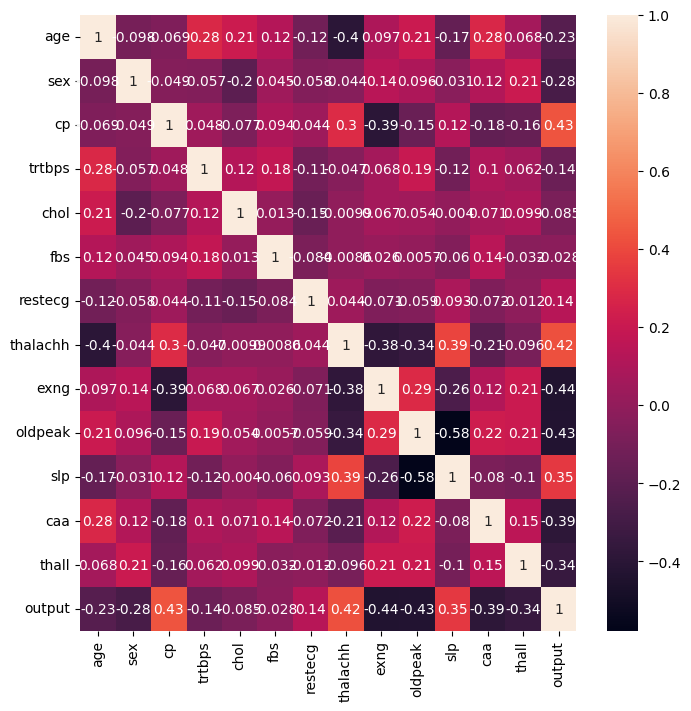

In [ ]:
plt.figure(figsize=(8 , 8))
sns.heatmap(data.corr() , annot=True)
plt.show()

### Correlation of Continuous Features (Alternative Approach)

In this step, we calculate the correlation of continuous variables with each other using a different approach. Instead of directly plotting the correlation matrix, we compute the correlation for the selected continuous features individually.

We use the `.corr()` method on a subset of the dataset containing only the continuous features, and then transpose the correlation matrix to make it easier to read and interpret. This approach allows us to focus on the pairwise relationships between continuous variables in the dataset.

The correlation values can give us insights into how strongly the variables are related to each other. By transposing the matrix, we ensure that the correlation values are displayed in a way that makes it easier to assess the strength of relationships between features.

This analysis helps identify any strong correlations between features that may require further attention, especially when preparing data for machine learning models.


In [ ]:
continues = ['age' , 'trtbps' , 'chol' , 'thalachh' , 'oldpeak' , 'caa']
data_corr = data[continues].corr().transpose()
data_corr


,age,trtbps,chol,thalachh,oldpeak,caa
age,1.000000,0.279351,0.213678,-0.398522,0.210013,0.276326
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,0.101389
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,0.070511
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.213177
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.222682
caa,0.276326,0.101389,0.070511,-0.213177,0.222682,1.000000


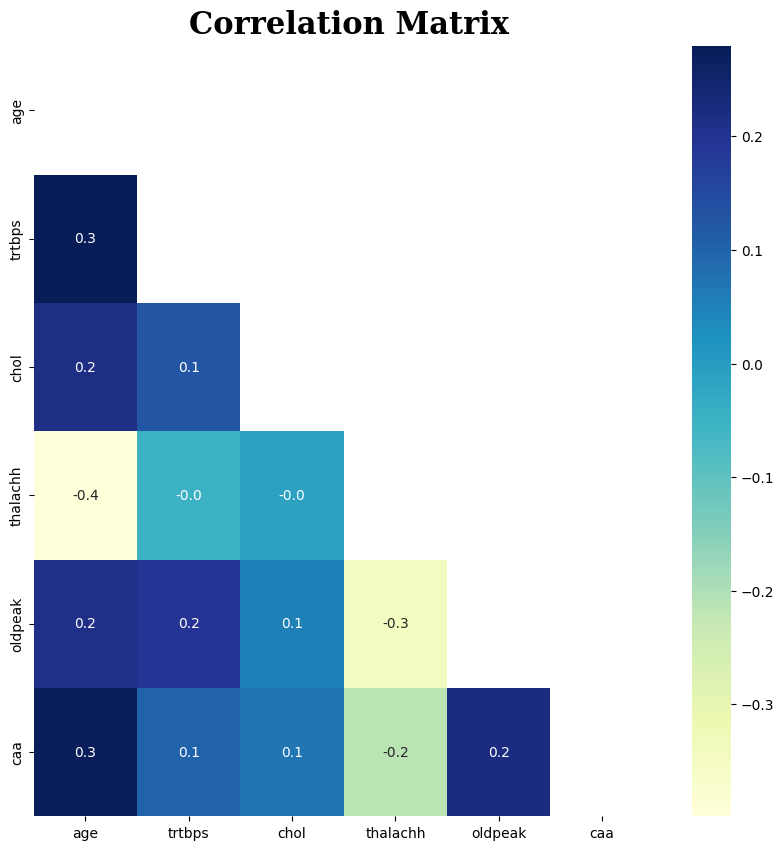

In [ ]:
import numpy as np
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(data_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
data_corr = data[continues].corr().transpose()
sns.heatmap(data_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

Scatterplot of heatmap.

<Figure size 1200x1200 with 0 Axes>

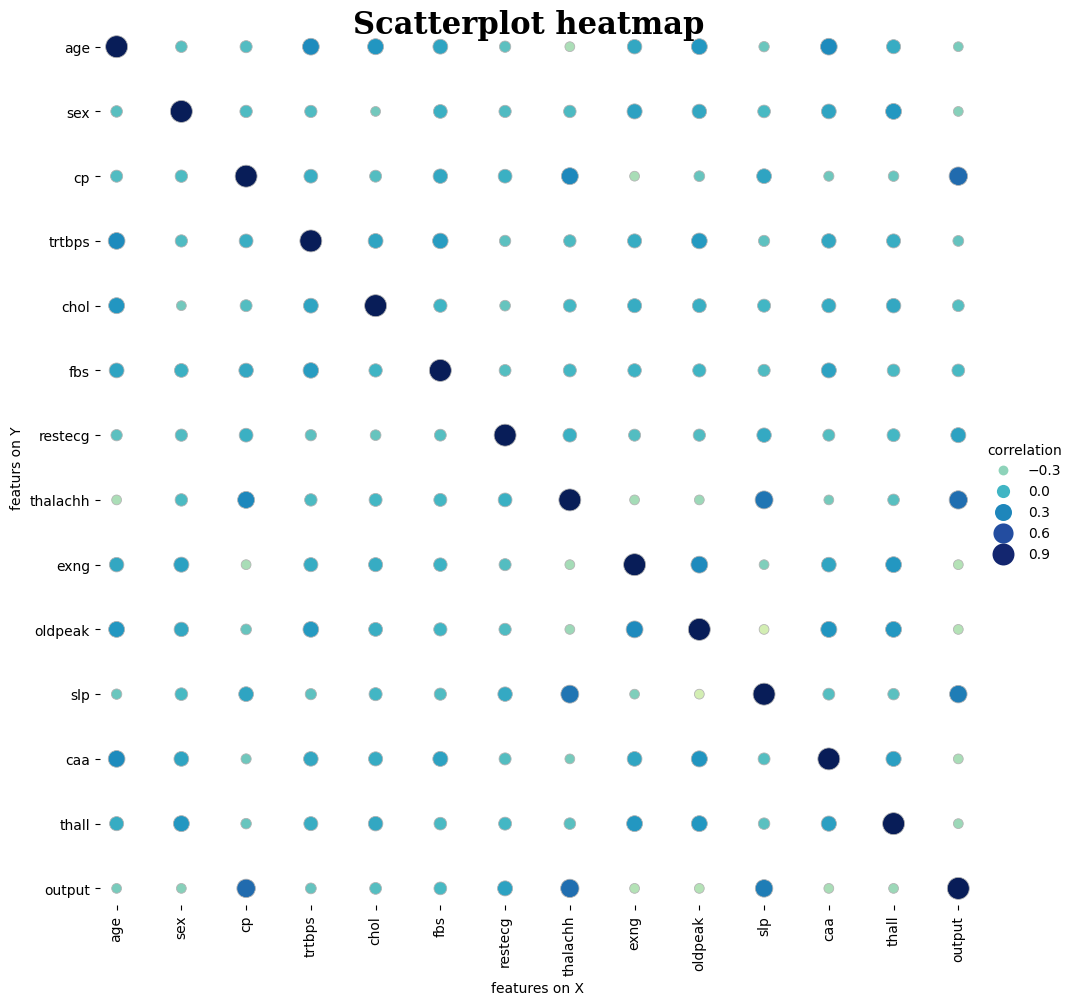

In [ ]:
fig = plt.figure(figsize=(12,12))
corr_mat = data.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

plt.show()

Distribution of Continous features accoridng to target Variables

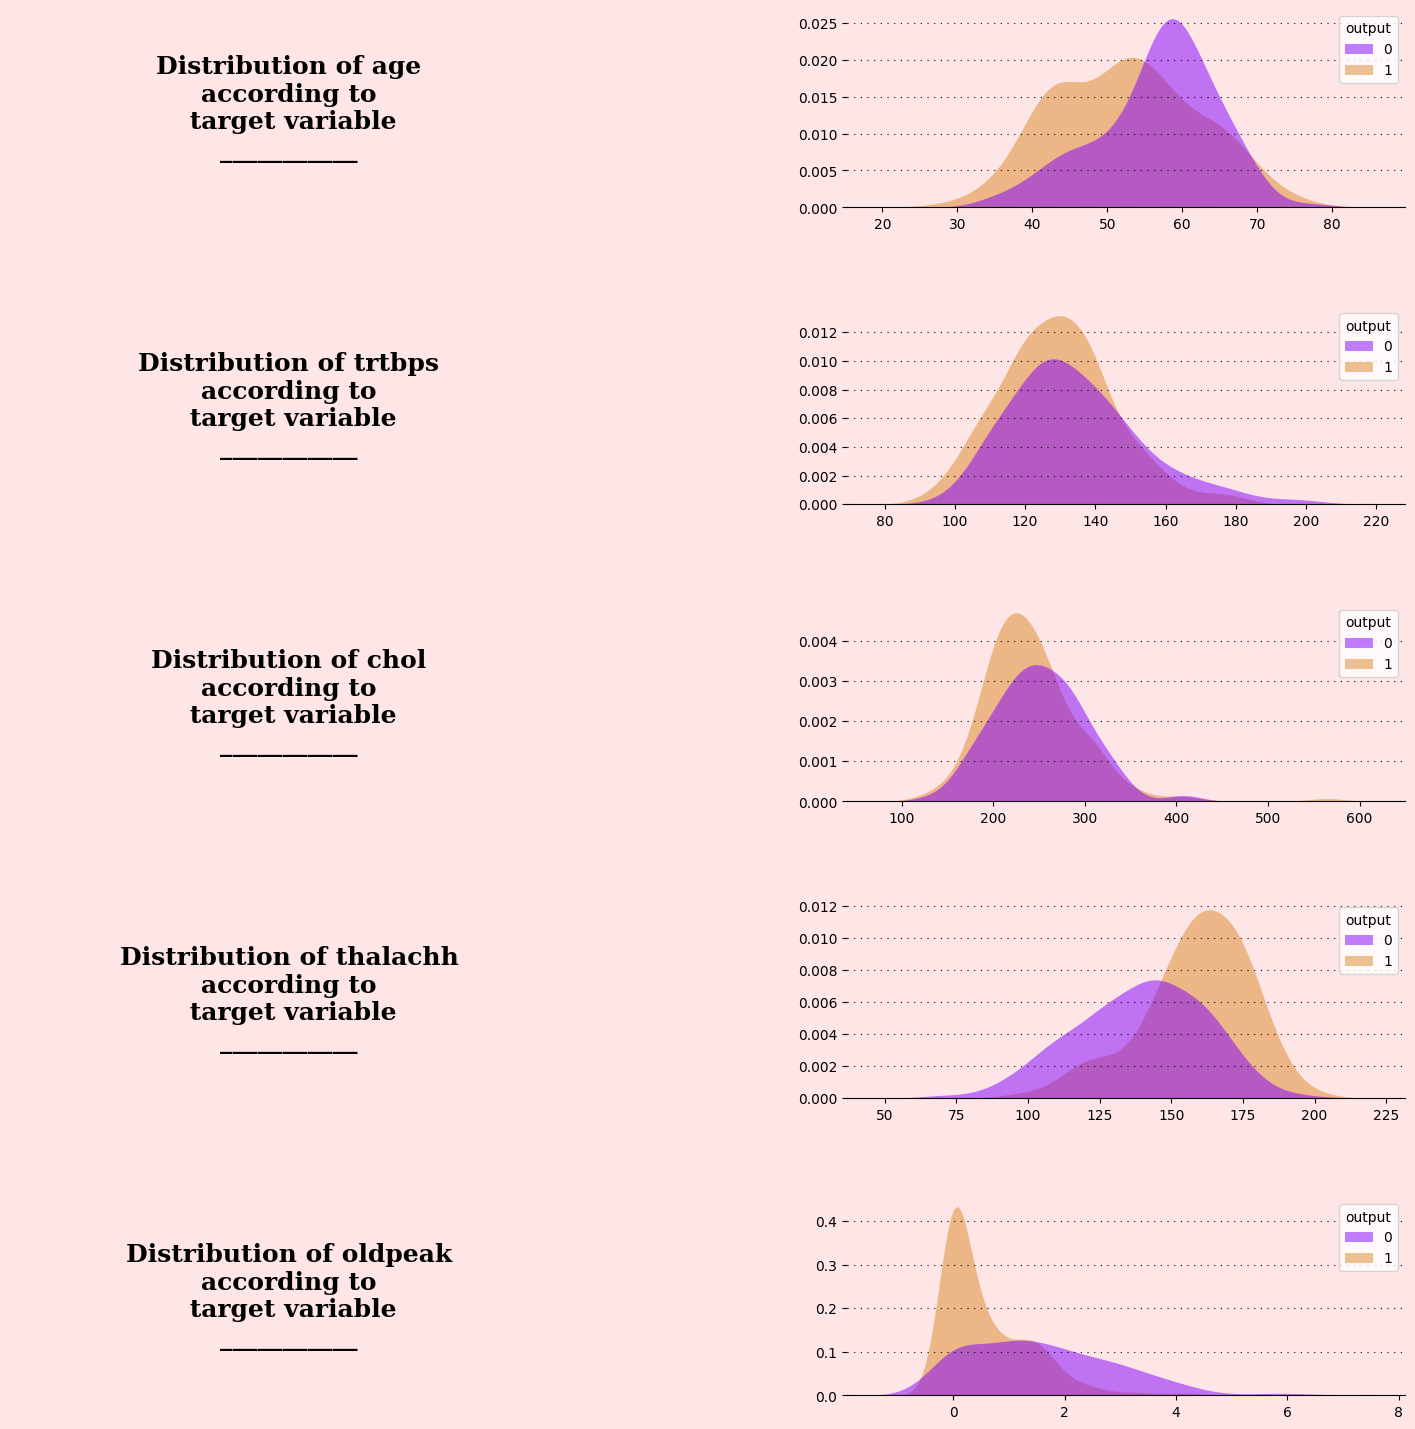

In [ ]:

fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=data, x='age',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribution of trtbps\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=data, x='trtbps',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=data, x='chol',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribution of thalachh\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=data, x='thalachh',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=data, x='oldpeak',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

Some other relations that seemed intuitive.

<ipython-input-73-ac433403016a>:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(ax=ax9, data=data,x='output',y='thalachh',palette=["#8000ff","#da8829"])


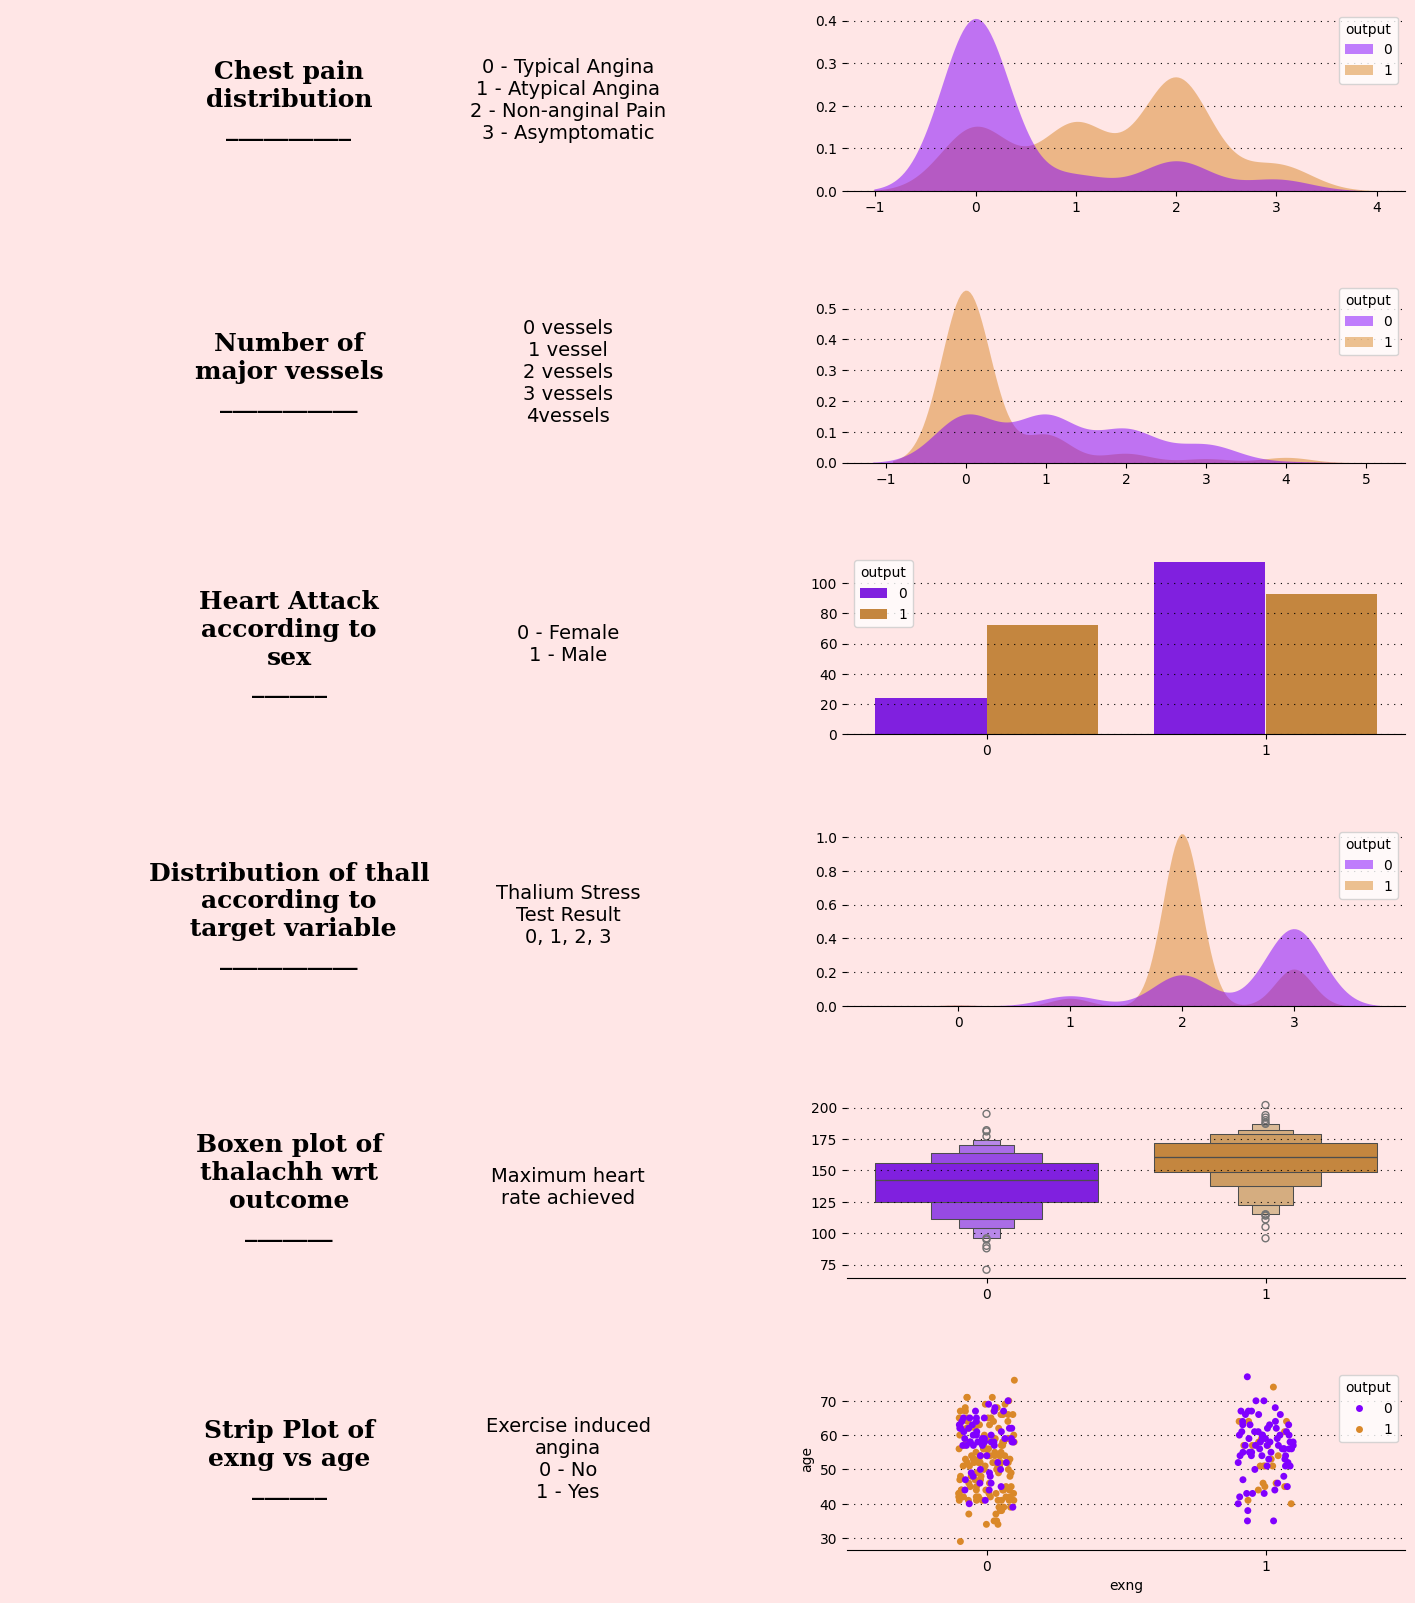

In [ ]:

fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)

# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Chest pain\ndistribution\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# Cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=data, x='cp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Caa title
ax2.text(0.5,0.5,"Number of\nmajor vessels\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 vessels\n1 vessel\n2 vessels\n3 vessels\n4vessels",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Caa
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=data, x='caa',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex title
ax4.text(0.5,0.5,"Heart Attack\naccording to\nsex\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=data,x='sex',palette=["#8000ff","#da8829"], hue='output')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thall title
ax6.text(0.5,0.5,"Distribution of thall\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thall
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=data, x='thall',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thalachh title
ax8.text(0.5,0.5,"Boxen plot of\nthalachh wrt\noutcome\n_______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"Maximum heart\nrate achieved",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Thalachh
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=data,x='output',y='thalachh',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")



# Exng title
ax10.text(0.5,0.5,"Strip Plot of\nexng vs age\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.text(1,.5,"Exercise induced\nangina\n0 - No\n1 - Yes",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)


# Exng
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax11, data=data,x='exng',y='age',hue='output',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)

### Pairplot of Continuous Features

In this step, we create a **pairplot** to visualize the relationships between pairs of continuous variables in the dataset. The pairplot provides a grid of scatter plots showing the interactions between each pair of features, along with the distribution of each individual feature along the diagonal.

We use the `hue='output'` parameter to color the points based on the **target variable** (presence or absence of heart disease). This allows us to visually inspect whether certain features distinguish between the two classes (heart disease vs no heart disease).

The **palette** parameter is used to assign distinct colors to each class for better clarity. Here, we have chosen purple (`#8000ff`) for one class and orange (`#da8829`) for the other.

By analyzing the pairplot, we can identify:
- Whether any pair of features shows a clear separation between the two classes.
- Trends and relationships that may be useful for building predictive models.



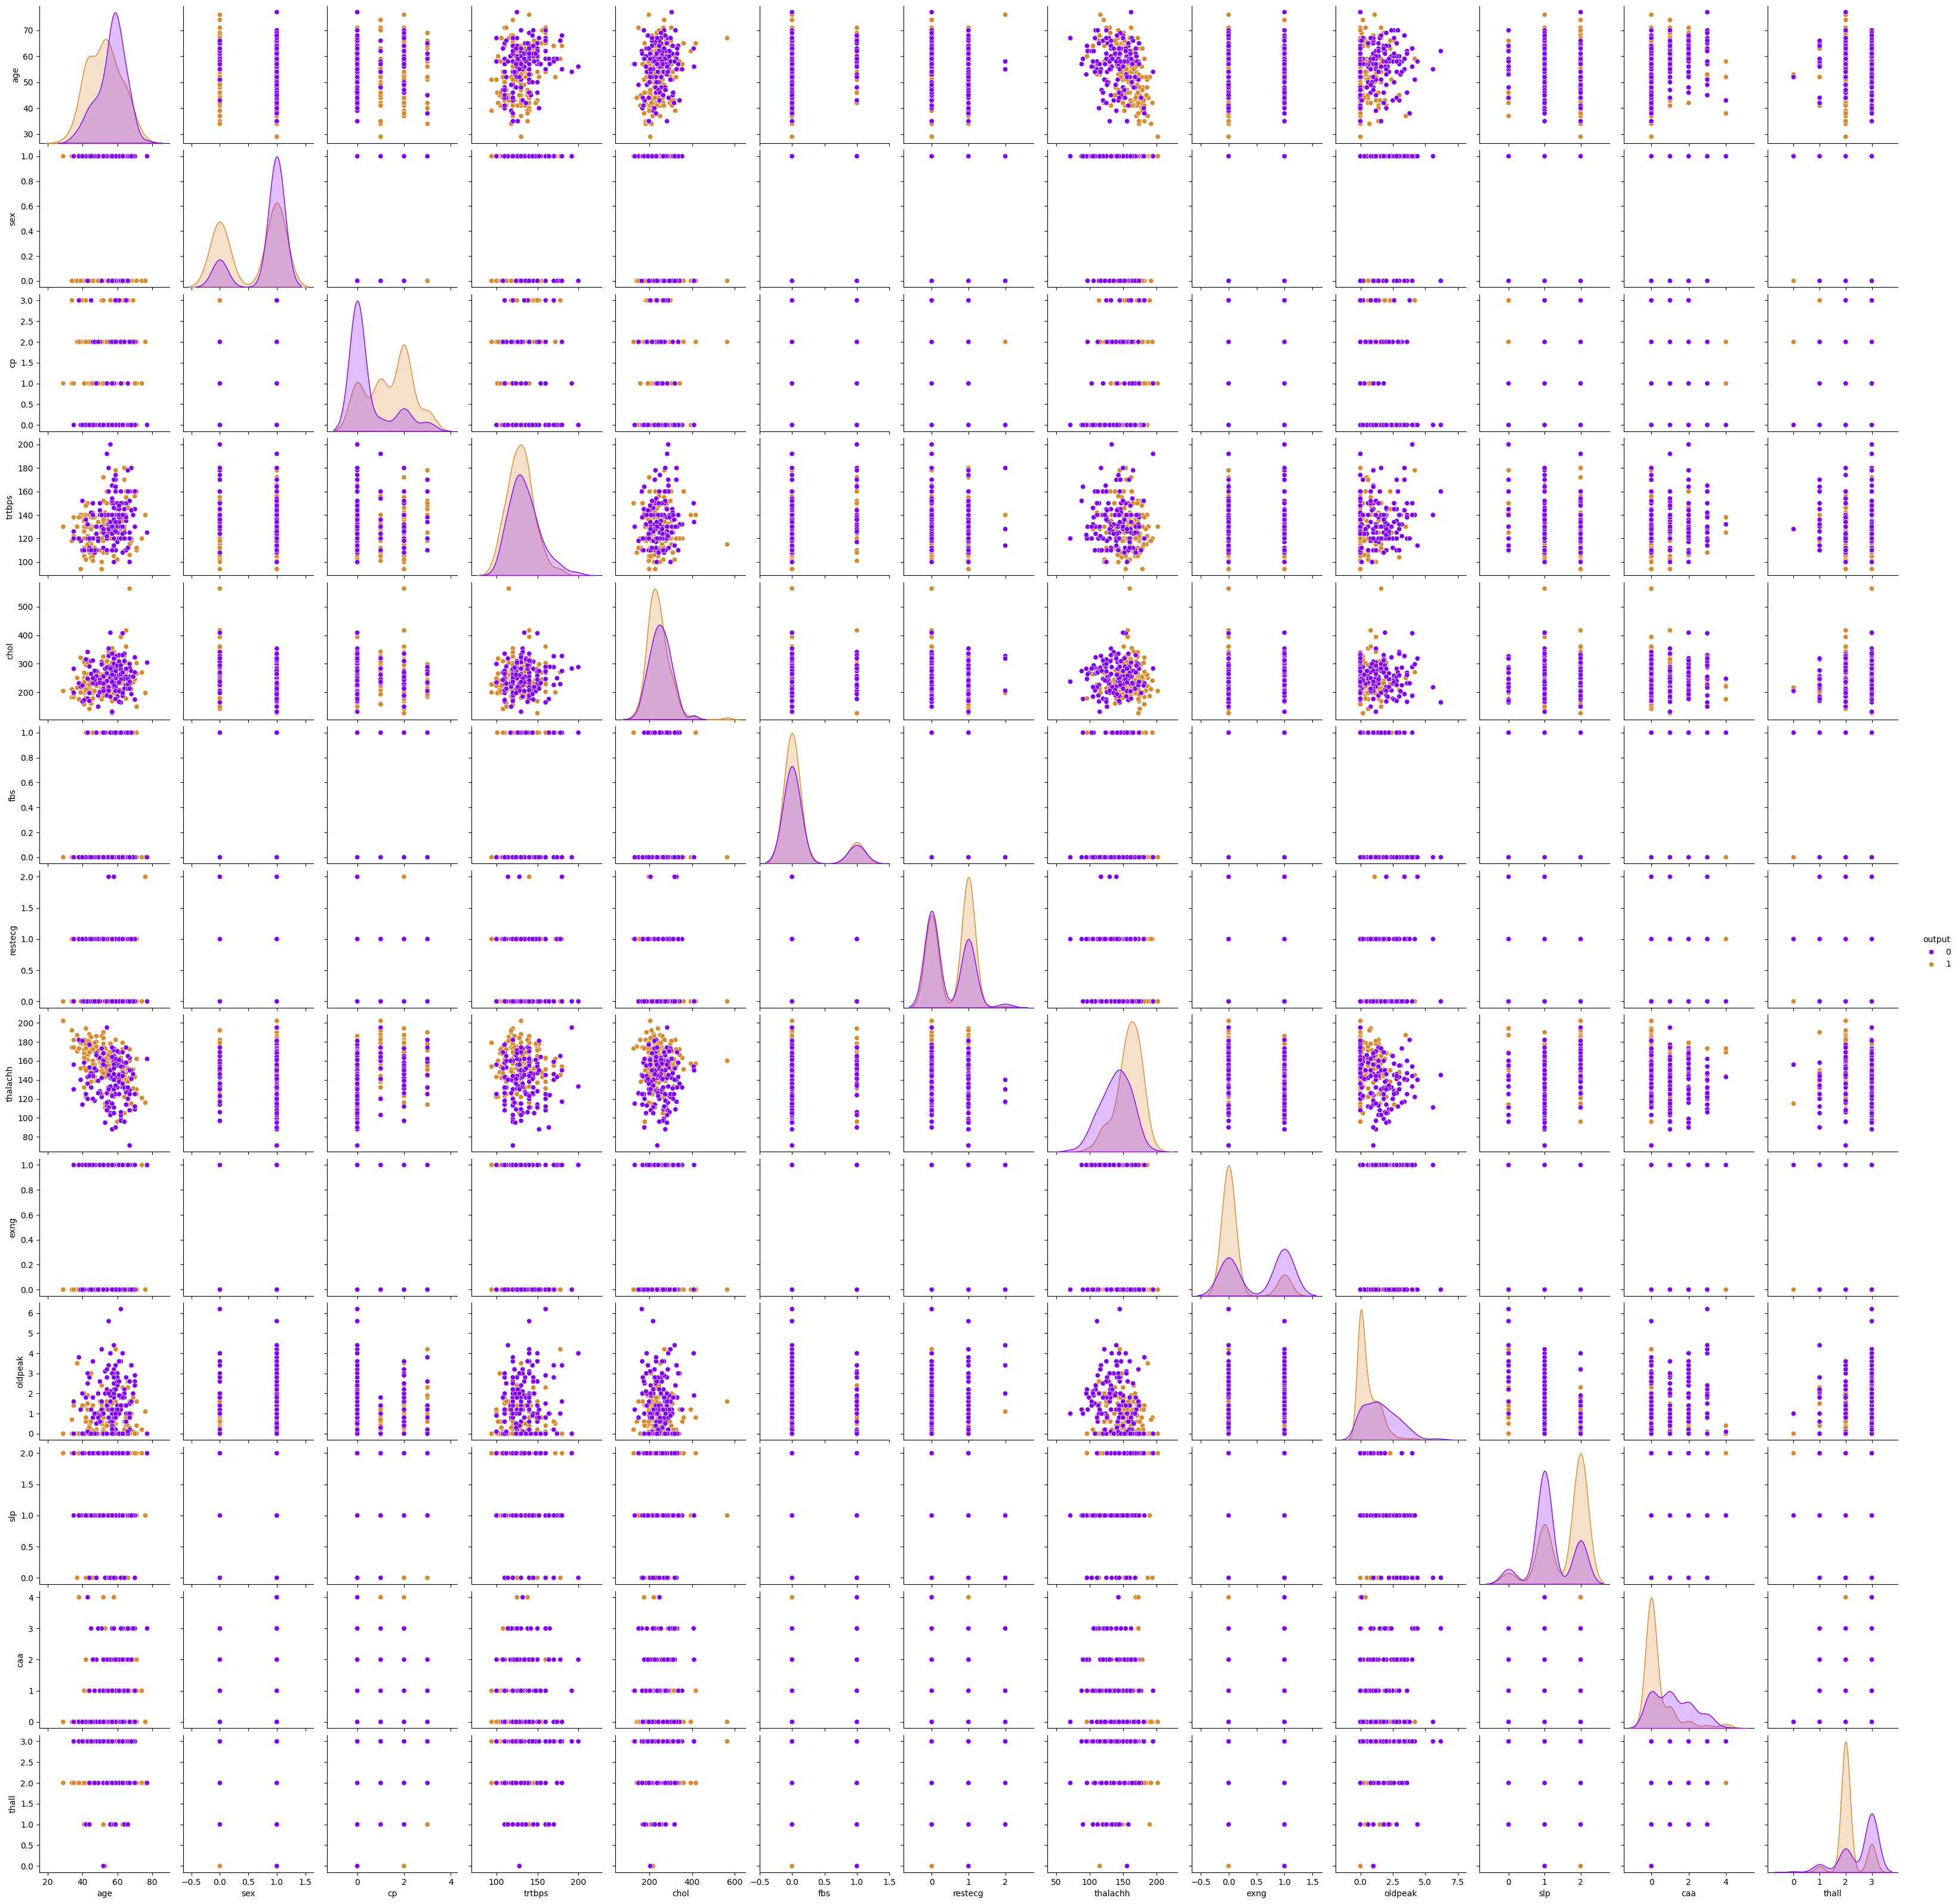

In [ ]:
sns.pairplot(data,hue='output',palette = ["#8000ff","#da8829"])
plt.show()

### Exploratory Data Analysis (EDA)

In this section, we performed **Exploratory Data Analysis (EDA)** on the heart disease dataset to better understand the structure, distribution, and relationships within the data. EDA is an essential step in any data analysis process as it helps uncover patterns, detect anomalies, and check assumptions, guiding us toward better insights and decisions.

The main steps we performed during EDA include:

1. **Data Inspection**:
   We started by loading the dataset and performing a preliminary inspection using `head()`, `info()`, and `describe()` methods. This helped us understand the basic structure of the data, including the number of features, data types, and presence of missing values.

2. **Handling Categorical and Continuous Variables**:
   We separated the features into **categorical** and **continuous** variables to handle them appropriately in subsequent analysis. We categorized features such as **sex**, **cp**, and **fbs** as categorical, while features like **age**, **chol**, and **thalachh** were treated as continuous variables.

3. **Correlation Analysis**:
   We examined the relationships between continuous variables using a **correlation matrix** and heatmap. This helped us identify which features are strongly correlated with each other and which features may have a strong relationship with the target variable, **output** (presence or absence of heart disease).

4. **Univariate Analysis**:
   We analyzed the distribution of each continuous and categorical variable individually by plotting **boxplots** and **histplots** for continuous variables and **countplots** for categorical variables. This allowed us to identify any skewness in the data, potential outliers, and the overall distribution of values for each feature.

5. **Bivariate Analysis**:
   We explored the relationships between the target variable **output** and other features using **pairplots** and **boxplots**. This helped us understand how the target variable interacts with both categorical and continuous variables.

6. **Outlier Detection**:
   We briefly discussed outlier detection using boxplots and how to handle them. Since our dataset has relatively few data points, we decided to retain outliers for the time being, as they may carry important information regarding the presence of heart disease.

By the end of this EDA, we have gained a clearer understanding of the dataset, including feature relationships, potential challenges such as imbalanced classes, and insights into how to proceed with data preparation for machine learning modeling.




<a name="ml-section"></a>
# Performing Machine Learning

## Data Preprocessing

Next step before implementing ML is to prepare data to feed into model. But lets first draw some conclusions from EDA.

## Conclusions from the EDA

In our exploratory data analysis (EDA), we thoroughly examined the structure and characteristics of the dataset to gain actionable insights and identify patterns that may influence heart disease outcomes. This analysis is crucial for understanding feature behavior and relationships, which lays the foundation for effective data preprocessing and modeling.

### Summary of Key Findings:

- **No Missing Values**: There were no missing values across all features in the dataset, allowing us to proceed without the need for imputation or removal of data points. This ensures data completeness throughout the analysis.
  
- **Outliers**: Certain continuous features displayed the presence of outliers. While these could have significant effects on specific models, we decided to retain them for now, as they may hold valuable information, particularly when working with tree-based models that are less sensitive to outliers.

- **Gender Distribution**: The dataset exhibited a pronounced imbalance in gender distribution, with more than twice the number of individuals with `sex = 1` (typically male) compared to `sex = 0`. This could influence the model's predictions and warrants consideration during modeling.

- **Linear Correlation Analysis**: Analyzing the heatmap for continuous variables revealed no strong linear correlations between features. This suggests a more complex relationship between features, making it critical to explore non-linear modeling approaches.

### Feature-Specific Observations:

- **Scatterplot Heatmap Observations**: The scatterplot heatmap indicated potential relationships between the target variable `output` (heart disease presence) and features such as `cp` (chest pain type), `thalachh` (maximum heart rate achieved), and `slp` (slope). These correlations hint at their potential predictive power in determining heart disease risk.

- **Age Distribution and Heart Attack Risk**: Contrary to intuition, the distribution plot of `age` with respect to `output` suggests that age alone may not be the strongest indicator of heart attack risk within this dataset. While age is often a key risk factor, its influence here requires further exploration alongside other features.

- **Maximum Heart Rate (thalachh)**: Analysis of `thalachh` (maximum heart rate achieved) shows that individuals with higher maximum heart rates are more prone to heart attacks. This feature may serve as an important predictor in modeling efforts.

- **Previous Peak (oldpeak)**: The `oldpeak` feature, representing previous peak values, indicates that individuals with lower peaks achieved are at a higher risk of heart attack. This finding aligns with existing clinical observations and may enhance model performance.

### Categorical Feature Insights:

- **Key Insights from Plot 3.2.4**:
  - Individuals with non-anginal chest pain (`cp = 2`) demonstrate a heightened risk of heart attack, making this feature critical in prediction models.
  - Those with zero major vessels (`caa = 0`) are more likely to experience a heart attack, highlighting the potential importance of vessel-related features in prediction tasks.
  - The higher prevalence of heart attacks among individuals with `sex = 1` underscores the importance of considering gender differences during modeling.
  - Individuals with a `thall` value of `2` show a notably higher chance of heart attack, making it a key categorical feature to analyze further.
  - People without exercise-induced angina (`exng = 0`) also exhibit a greater risk, indicating a possible interaction effect with other features.

In summary, the EDA has provided a comprehensive understanding of the dataset, including potential predictors, distributional patterns, and feature relationships. This groundwork prepares us for effective feature engineering, data preprocessing, and building predictive models tailored to heart disease risk prediction.


## Importing Required packages

In [3]:
#Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report , roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Package Imports Overview & Need

In this section, we have imported several packages and modules that are essential for various tasks involved in data preprocessing, model training, and evaluation. Here’s a brief description of the purpose and usage of each import:

#### Data Scaling
- **`from sklearn.preprocessing import RobustScaler`**  
  The `RobustScaler` is used to scale the features of the dataset. Unlike standard scaling methods, it is robust to outliers, making it ideal for datasets where outliers may distort traditional scaling approaches. It scales the data by removing the median and scaling according to the interquartile range (IQR).

#### Data Splitting
- **`from sklearn.model_selection import train_test_split`**  
  `train_test_split` is used to split the dataset into training and testing sets. This helps to evaluate the performance of machine learning models on unseen data and ensures that the models do not overfit the data during training.

#### Machine Learning Models
- **`import torch`**  
  `torch` is part of the PyTorch library, used for building and training deep learning models. It provides a flexible tensor computation and automatic differentiation framework, making it ideal for creating neural networks.
- **`import torch.nn as nn`**  
  This module is used to define and build neural network architectures with various layers and activation functions, simplifying deep learning model creation.
- **`from sklearn.svm import SVC`**  
  The `SVC` (Support Vector Classifier) is used for classification tasks. It creates a decision boundary between different classes by finding the hyperplane that best separates them in feature space.
- **`from sklearn.linear_model import LogisticRegression`**  
  `LogisticRegression` is a linear model for binary classification problems. It estimates the probability that a data point belongs to a particular class by using a logistic function.
- **`from sklearn.ensemble import RandomForestClassifier`**  
  The `RandomForestClassifier` is an ensemble method that builds multiple decision trees and merges their outputs to improve predictive accuracy and reduce overfitting.
- **`from sklearn.tree import DecisionTreeClassifier`**  
  The `DecisionTreeClassifier` builds a tree structure for decision-making, where each node represents a feature and branches represent decisions, making it easy to interpret the results.
- **`from sklearn.neighbors import KNeighborsClassifier`**  
  `KNeighborsClassifier` is a simple, non-parametric algorithm used for classification by finding the most similar instances (nearest neighbors) in the feature space.
- **`from sklearn.ensemble import GradientBoostingClassifier`**  
  This classifier builds an additive model in a forward stage-wise fashion. It allows for optimization of arbitrary differentiable loss functions, making it powerful for classification tasks.

#### Model Evaluation Metrics
- **`from sklearn.metrics import accuracy_score, classification_report, roc_curve`**  
  - `accuracy_score` measures the accuracy of predictions by comparing them with actual labels.
  - `classification_report` provides a detailed performance analysis of the model, including precision, recall, and F1-score for each class.
  - `roc_curve` plots the Receiver Operating Characteristic (ROC) curve, which is useful for visualizing the performance of classification models, especially when working with imbalanced datasets.

#### Cross-Validation and Hyperparameter Tuning
- **`from sklearn.model_selection import cross_val_score`**  
  `cross_val_score` performs cross-validation on the data, splitting it into different folds and evaluating model performance on each fold. It is useful for assessing model robustness and generalization.
- **`from sklearn.model_selection import GridSearchCV`**  
  `GridSearchCV` is used for hyperparameter tuning by performing an exhaustive search over a specified parameter grid. It helps find the optimal combination of hyperparameters that maximize model performance.


## Making Features Model-Ready: Scaling and Encoding
To prepare our data for use with machine learning models, it is important to encode categorical variables and scale continuous features. This ensures that our data is properly structured and standardized for model training, particularly for algorithms sensitive to feature magnitudes.


In [4]:
# Making duplicate object of data
df = data

In [5]:
#define Columns to encoded and scaled
cat_cols = ['cp',  'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
con_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [6]:
# Encoding the categorical columns

df = pd.get_dummies(df, columns = cat_cols, drop_first = True)
df.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,True,True,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,True,False,False,True,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,False,True,False,False,True,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,False,False,False,True,False,False,True,False,True,False


In [7]:
# defining the features and targe

x = df.drop(['output'] , axis = 1)
y = df['output']
y2 = df[['output']]

In [ ]:
x

,age,sex,trtbps,chol,thalachh,oldpeak,cp_1,cp_2,cp_3,exng_1,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,63,1,145,233,150,2.3,False,False,True,False,...,False,True,True,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,False,True,False,False,...,True,False,False,True,False,False,False,False,True,False
2,41,0,130,204,172,1.4,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,56,1,120,236,178,0.8,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,57,0,120,354,163,0.6,False,False,False,True,...,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,123,0.2,False,False,False,True,...,False,False,False,True,False,True,False,False,False,True
299,45,1,110,264,132,1.2,False,False,True,False,...,False,True,False,True,False,True,False,False,False,True
300,68,1,144,193,141,3.4,False,False,False,False,...,False,False,True,True,False,True,False,False,False,True
301,57,1,130,131,115,1.2,False,False,False,True,...,False,False,False,True,False,True,False,False,False,True


In [ ]:
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
y2

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [8]:
print(type(y))
print(type(y2))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [9]:
scalar = RobustScaler()

In [11]:
# Scaling the continuous Features
x[con_cols] = scalar.fit_transform(x[con_cols])
print("First Five rows of X are : ")
x.head()

First Five rows of X are : 


,age,sex,trtbps,chol,thalachh,oldpeak,cp_1,cp_2,cp_3,exng_1,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,1,0.75,-0.110236,-0.092308,0.9375,False,False,True,False,...,False,True,True,False,False,False,False,True,False,False
1,-1.333333,1,0.00,0.157480,1.046154,1.6875,False,True,False,False,...,True,False,False,True,False,False,False,False,True,False
2,-1.037037,0,0.00,-0.566929,0.584615,0.3750,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,0.074074,1,-0.50,-0.062992,0.769231,0.0000,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,0.148148,0,-0.50,1.795276,0.307692,-0.1250,False,False,False,True,...,False,False,False,True,False,False,True,False,True,False


## Train & Test Split

In [12]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", x_train.shape)
print("The shape of X_test is       ",x_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 25)
The shape of X_test is        (61, 25)
The shape of y_train is       (242,)
The shape of y_test is        (61,)


# **Modelling**

## 1.1 Linear Classifier:

### 1.1.1 Support Vector Machine

In [13]:
# Defining the model
clf = SVC(kernel = 'linear' , C=1 , random_state = 42)

In [14]:
clf.fit(x_train , y_train)

SVC(C=1, kernel='linear', random_state=42)

In [15]:
#Predicting the Values
y_pred  = clf.predict(x_test)

In [16]:
# Accuracy :
svc_acc = accuracy_score(y_test , y_pred)
print("The test accuracy of SVC is : " , svc_acc*100)

The test accuracy of SVC is :  86.88524590163934



## 1.1.2 Hyperparameter Tuning of Support Vector Classifier (SVC)
Hyperparameter tuning is a crucial step in building an optimal Support Vector Classifier (SVC) model. By fine-tuning the hyperparameters, we can improve the model's predictive performance and generalizability on unseen data. SVC, part of the Support Vector Machine (SVM) family, has several hyperparameters that significantly impact its performance. Here's what we need to focus on:


In [17]:
# Instantiating the Object
svm = SVC()

# setting a grid
parameters = { "C":np.arange(1 ,10 , 1) , 'gamma' : [0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm , parameters)

# fitting the object
searcher.fit(x_train , y_train)

# The scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)





The best params are : {'C': 3, 'gamma': 0.1}
The best score is   : 0.8261904761904763


In [18]:
# predicting the values
y_pred = searcher.predict(x_test)
# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM after hyper-parameter tuning is  0.8852459016393442


In [30]:
hyp_svc = accuracy_score(y_test, y_pred)

In [19]:
print("Score Before Hyperparameter Tuning: " , searcher.best_score_)
print("Score After Hyperparameter Tuning: " , accuracy_score(y_test, y_pred))

Score Before Hyperparameter Tuning:  0.8261904761904763
Score After Hyperparameter Tuning:  0.8852459016393442


## 1.1.3 Logistic Regression

In [20]:
# instantiating an Object
logreg = LogisticRegression()

# Fitting
logreg.fit(x_train , y_train)



LogisticRegression()

In [27]:
# Prediction
y_pred_proba = logreg.predict_proba(x_test)

In [28]:
# Fingind the predicted value
y_pred = np.argmax(y_pred_proba , axis = 1)

log_acc = accuracy_score(y_test , y_pred)
# Finding the accuracy score
print("The accuracy score is : " , accuracy_score(y_test , y_pred))

The accuracy score is :  0.9016393442622951


## 1.1.4 ROC Curve

In [23]:
# Calculating the probabilities
y_pred_proba = logreg.predict_proba(x_test )[:,1]

# Instantiating the ROC curve
fpr , tpr , threshols  = roc_curve(y_test , y_pred_proba)



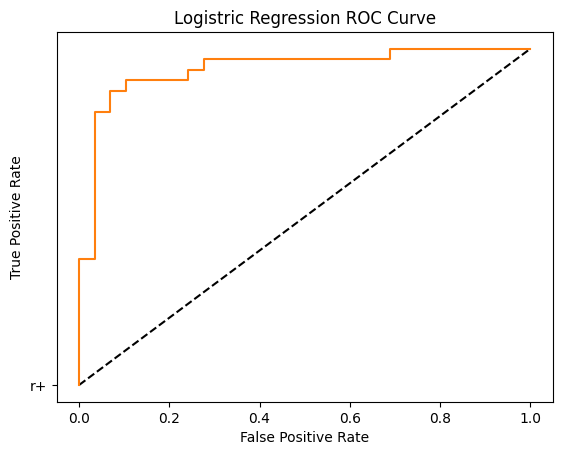

In [24]:
# Plotting The Curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

## Plotting & Analyzing The Scores:

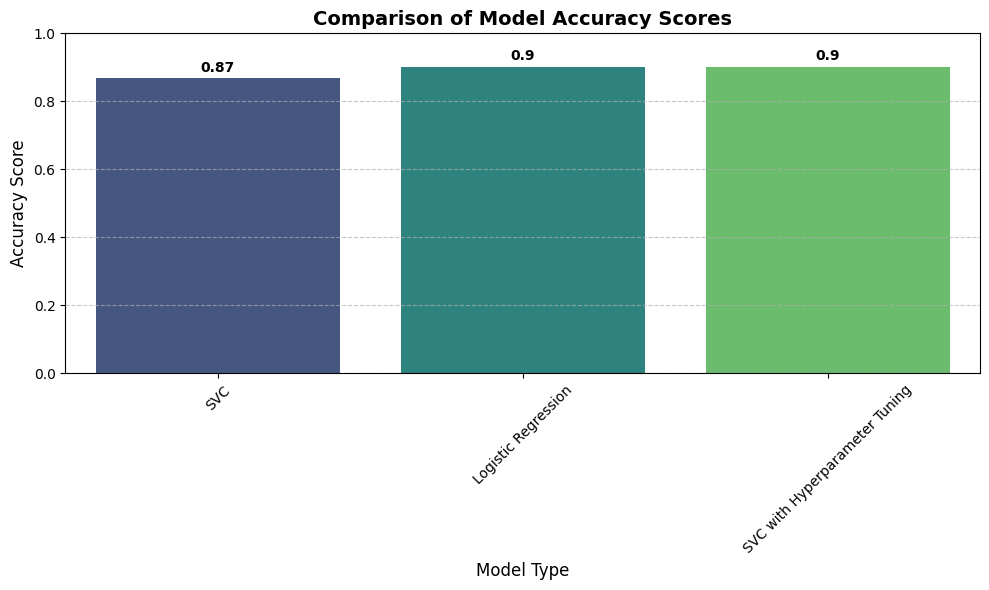

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the accuracy scores of the models
model_names = ['SVC', 'Logistic Regression', 'SVC with Hyperparameter Tuning']
accuracy_scores = [svc_acc, log_acc, hyp_svc]  # Replace these with your actual accuracy scores

# Create a DataFrame for easy plotting (optional, but helpful for larger datasets)
import pandas as pd
df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
plt.title('Comparison of Model Accuracy Scores', fontsize=14, fontweight='bold')
plt.xlabel('Model Type', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0, 1)  # Since accuracy is between 0 and 1
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate each bar with the accuracy score
for index, row in df.iterrows():
    plt.text(index, row.Accuracy + 0.01, round(row.Accuracy, 2), ha='center', va='bottom', fontweight='bold')

plt.show()


# 2.1 Tree Models

## 2.1.1 Decision Tree

In [32]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(x_train, y_train)

# calculating the predictions
y_pred = dt.predict(x_test)

dec_tree_score = accuracy_score(y_test, y_pred)
# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.6885245901639344


## 2.1.2 Random Forrest


In [33]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(x_train, y_train)

# calculating the predictions
y_pred = dt.predict(x_test)

ranfor_score = accuracy_score(y_test, y_pred)
# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.6885245901639344


## 2.1.3 Gradient Boosting Classifier (Without Training)


In [34]:
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(x_train ,y_train)

# predicting values
y_pred = gbt.predict(x_test)

gbc_score = accuracy_score(y_test, y_pred)

# printing the test accuracy
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Gradient Boosting Classifier is  0.8852459016393442


## Plotting the Scores:


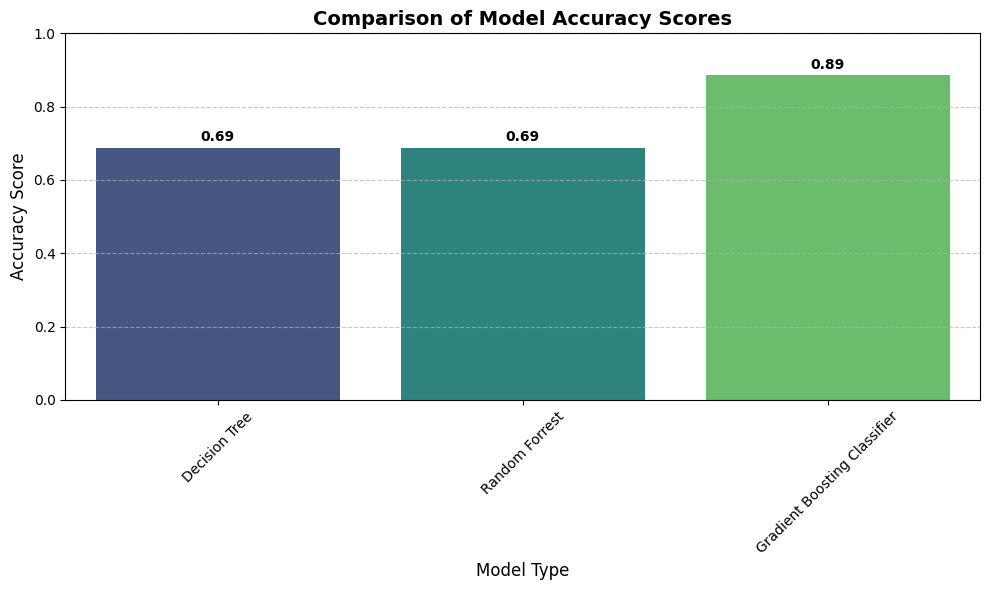

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the accuracy scores of the models
model_names = ['Decision Tree', 'Random Forrest', 'Gradient Boosting Classifier']
accuracy_scores = [dec_tree_score, ranfor_score, gbc_score]  # Replace these with your actual accuracy scores

# Create a DataFrame for easy plotting (optional, but helpful for larger datasets)
import pandas as pd
df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
plt.title('Comparison of Model Accuracy Scores', fontsize=14, fontweight='bold')
plt.xlabel('Model Type', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0, 1)  # Since accuracy is between 0 and 1
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate each bar with the accuracy score
for index, row in df.iterrows():
    plt.text(index, row.Accuracy + 0.01, round(row.Accuracy, 2), ha='center', va='bottom', fontweight='bold')

plt.show()


## Plotting All together
1. Linear Regression
2. Tree Modeling

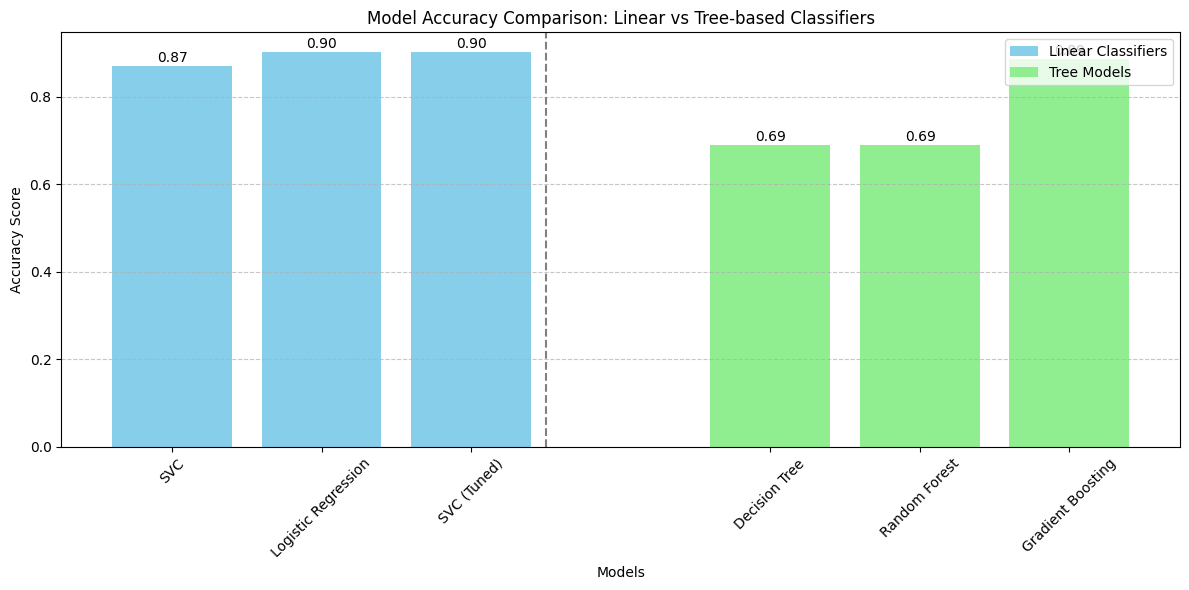

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and their corresponding accuracy scores
linear_models = ['SVC', 'Logistic Regression', 'SVC (Tuned)']
tree_models = ['Decision Tree', 'Random Forest', 'Gradient Boosting']
linear_accuracies = [svc_acc, log_acc, hyp_svc]  # Replace with your actual accuracy scores
tree_accuracies = [dec_tree_score, ranfor_score, gbc_score]  # Replace with your actual accuracy scores

# Combining model names and accuracies
model_names = linear_models + tree_models
accuracies = linear_accuracies + tree_accuracies

# Setting up the plot
plt.figure(figsize=(12, 6))

# Creating x-axis categories with gaps to distinguish linear and tree models
x_pos_linear = np.arange(len(linear_models))
x_pos_tree = np.arange(len(tree_models)) + len(linear_models) + 1
x_pos = np.concatenate((x_pos_linear, x_pos_tree))

# Plotting bars
plt.bar(x_pos_linear, linear_accuracies, color='skyblue', label='Linear Classifiers')
plt.bar(x_pos_tree, tree_accuracies, color='lightgreen', label='Tree Models')

# Adding text annotations for accuracy scores
for i, v in enumerate(accuracies):
    plt.text(x_pos[i] - 0.1, v + 0.01, f"{v:.2f}", fontsize=10)

# X-axis labels and titles
plt.xticks(x_pos, model_names, rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison: Linear vs Tree-based Classifiers')
plt.axvline(x=len(linear_models) - 0.5, color='gray', linestyle='--')  # Divider line
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


Surprisingly, Linear Classifiers are showing more accuracy than Tree Models.

### Conclusion

In this notebook, we performed a thorough **Exploratory Data Analysis (EDA)** on the heart disease dataset, which aimed to identify patterns and relationships between features that could be useful in predicting the presence of heart disease. Here’s a summary of what we did:

- **Data Inspection**: We examined the dataset to check for missing values, understand the data types, and review summary statistics. We found that there were no missing values in the dataset, and we categorized features into continuous and categorical types.
  
- **Univariate Analysis**: We explored the distribution of both continuous and categorical features using **boxplots**, **histplots**, and **countplots**. This allowed us to assess the overall shape and distribution of the data, as well as detect any potential outliers.

- **Correlation Analysis**: We analyzed the correlation between continuous features to identify relationships and potential multicollinearity. A correlation matrix and heatmap were used to visualize these relationships, which helped us identify strong predictors for heart disease.

- **Bivariate Analysis**: We examined how the target variable, **output**, relates to other features through **pairplots** and **boxplots**. This helped us understand how certain features might differentiate between the presence and absence of heart disease.

- **Outlier Handling**: Although we detected outliers, we chose to leave them as is for now, given the limited number of data points and their potential importance in the analysis.

### Next Steps:
With EDA completed, the next step is to prepare the dataset for machine learning. This involves splitting the data into training and testing sets, scaling or normalizing certain features if needed, and applying appropriate machine learning algorithms such as **Logistic Regression**, **Decision Trees**, or **Random Forest** to predict heart disease. We can also fine-tune the model and evaluate its performance using various metrics like **accuracy**, **precision**, and **recall**.

This EDA has laid a solid foundation for model building and further analysis of the heart disease dataset.


**Next We performed ML**

We performed an in-depth analysis and machine learning modeling on the Heart Disease dataset, aiming to predict the likelihood of heart disease based on various medical and lifestyle features. Our approach was systematically divided into data analysis, feature engineering, and predictive modeling using both linear and tree-based models. Here's a summary of our key steps and findings:

## Final Thoughts:
This project demonstrated the utility of machine learning for predicting heart disease risk, providing a data-driven approach to support clinical decision-making. While initial models have shown promising results, continuous refinement and validation are essential to enhance predictive accuracy, robustness, and interpretability. By bridging data science with healthcare, this work aims to contribute toward more informed, timely, and personalized heart disease risk assessments.

### If you like the notebook, consider giving an upvote.
Check my other notebooks

1. https://github.com/FaizanSSDQ/Machine-Learning-Projects/tree/main/Digit-Classifier-ANN-Keras
2. https://github.com/FaizanSSDQ/Machine-Learning-Projects/tree/main/Digit-Classifier-CNN-Tensorflow
3. https://github.com/FaizanSSDQ/Machine-Learning-Projects/tree/main/Intel-8-Class-CNN-Model


# Happy Coding........................